# Experiment 1

- Few Parameters (2x2) => 4 model runs
- existing market pressure as the initial prices are not proportional to trade sizes
- 5 LPs providing entirety of respective tokens (1-5) each
- one trader executing random actions with probabilities:
    - 'sell_r2_for_r1': 0.5,
    - 'sell_r1_for_r2': 0,
    - 'sell_r4_for_r3': 0.25,
    - 'sell_r3_for_r4': 0.25
- asset 5 is not affected by trader's actions

## Setup for initialization

- Asset balances in the Omnipool:
    - Asset 1: 7,000
    - Asset 2: 90,000
    - Asset 3: 13,000,000
    - Asset 4: 8,300,000
- LERNA balances in the Omnipool:
    - Against Asset 1: 117,000,000
    - Against Asset 2: 109,000,000
    - Against Asset 3: 80,000,000
    - Against Asset 4: 15,500,000

In [1]:
import numpy as np

In [2]:
asset1 = 7000
asset2 = 90000
asset3 = 13000000
asset4 = 8300000
asset5 = 100000

# reassign to 0-4

In [3]:
initial_assets_in_pool = np.array([asset1, asset2, asset3, asset4, asset5])
initial_assets_in_pool

array([    7000,    90000, 13000000,  8300000,   100000])

In [4]:
lerna1 = 117000000
lerna2 = 109000000
lerna3 = 80000000
lerna4 = 15500000
lerna5 = 100000


In [5]:
initial_lerna_in_pool = np.array([lerna1, lerna2, lerna3, lerna4, lerna5])
initial_lerna_in_pool

array([117000000, 109000000,  80000000,  15500000,    100000])

In [6]:
initial_prices_in_pool = initial_lerna_in_pool / initial_assets_in_pool 
#initial_prices_in_pool = initial_assets_in_pool / initial_lerna_in_pool ## this is the WRONG one#
## Changed for the purpose of 1:1 shares to asset ratios and consequently prices
#initial_prices_in_pool = initial_assets_in_pool / initial_assets_in_pool 
## Changed for the purpose of 1:1 shares to asset ratios and consequently prices
initial_prices_in_pool

array([1.67142857e+04, 1.21111111e+03, 6.15384615e+00, 1.86746988e+00,
       1.00000000e+00])

In [7]:
#data_f['int'] = data_f['test'].astype('int64')

### calculate prices (denominated in LERNA)

In [8]:
p1 = lerna1 / asset1 
p2 = lerna2 / asset2  
p3 = lerna3 / asset3 
p4 = lerna4 / asset4  
p5 = lerna5 / asset5 
prices = [p1, p2, p3, p4, p5]
prices = initial_prices_in_pool
prices

array([1.67142857e+04, 1.21111111e+03, 6.15384615e+00, 1.86746988e+00,
       1.00000000e+00])

In [9]:
#from model.model_initialization import * 
#initialize_model([1000000, 1500000, 2000000, 2500000, 3000000], 100, 0.01, 0.00)

In [10]:
#########################################################
#           import of packages & dependencies
#########################################################
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.model_initialization import * 

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


#########################################################
#     setting of experiment variables & parameters
#########################################################

# fee_levels_total = 0.005, 0.050
# fee_level_assets = fee_levels_total / 2
# fee_level_hdx = fee_levels_total / 2

fee_level_assets = (0.0000, 0.0001, 0.0002, 0.0003, 0.0004) #10-50bps
fee_level_assets = (0.0000, 0.0001)
#fee_level_assets = [0.0001]
fee_level_hdx = 0.01
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
#trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
#liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)
trade_volume = [100, 110, 120]
trade_volume = [1, 2] ##scale for reasonable size required
#trade_volume = [1] ##scale for reasonable size required
#liquidity_providers = [1000000, 1500000, 2000000, 2500000, 3000000]
liquidity_providers = initial_lerna_in_pool

sim_nr = 0

#########################################################
#     specification of agent (for non-hard-coded calculations)
#########################################################

performance_of_agent = 'LP3'


if performance_of_agent == 'LP1':
    asset_of_agent = 'omniR1'
elif performance_of_agent == 'LP2':
    asset_of_agent = 'omniR2'
elif performance_of_agent == 'LP3':
    asset_of_agent = 'omniR3'

#########################################################
#     preparation of empty result matrix
#########################################################

m=len(trade_volume)
n=len(fee_level_assets)
matrix = np.ndarray(shape = (m,n), dtype = int)
matrix1 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix2 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix3 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix4 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix5 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix_ror = np.ndarray(shape = (m,n), dtype = int)
matrix_ror1 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror2 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror3 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror4 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror5 = np.ndarray(shape = (m,n), dtype = float)


#########################################################
#     repeated simulation runs with above parameters
#########################################################


for i in range(len(fee_level_assets)):
    for j in range(len(trade_volume)):
        #########################################################
        # initialize model with starting conditions for each run
        #########################################################
        
        config_params = initialize_model(initial_lerna_in_pool, trade_volume[j], fee_level_assets[i], fee_level_hdx, initial_prices_in_pool, initial_assets_in_pool)
        
        #########################################################
        # run model with above initialization
        #########################################################
        
        config_dict, state = init_utils.get_configuration(config_params)
        
        print(state)
        print(config_dict)

        pd.options.mode.chained_assignment = None  # default='warn'
        pd.options.display.float_format = '{:.2f}'.format
        
        run.config(config_dict, state)
        events = run.run()
        
        rdf, agent_df = processing.postprocessing(events)

        #########################################################
        # calculate profitability metrics; change in pool values
        #########################################################
        
         
        print(sim_nr)
        total_timesteps = config_params.get('action_ls')[0][1] #grabbing the same total timestep as through initialize_model
        #total_timesteps = 1000
        first_timestep = 1
        print(total_timesteps)
        
        ## merge agent and pool dataframes
        profit_results = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])
        
        ## assign additional columns
        profit_results['val_pool'] = profit_results.apply(lambda x: processing.val_pool(x), axis=1)
        initial_values = config_params['initial_values']
        agent_d = config_params['agent_d']
        withdraw_agent_d = processing.get_withdraw_agent_d(initial_values, agent_d)
        print(withdraw_agent_d)
        profit_results['val_hold'] = profit_results.apply(lambda x: processing.val_hold(x, withdraw_agent_d), axis=1)
        #profit_results['IL'] = profit_results.apply(lambda x: x['val_pool']/x['val_hold'] - 1, axis=1)
        profit_results['pool_val'] = profit_results.apply(lambda x: processing.pool_val(x), axis=1)
        
        ## calculate profits from 'val_pool' for initialized agent     
        profit_results1 = profit_results[profit_results['simulation'] == sim_nr]
        profit_results2 = profit_results1[profit_results1['timestep'] == total_timesteps]
        profit_results3 = profit_results1[profit_results1['timestep'] == first_timestep]
        profit_results4 = profit_results2[profit_results2['agent_label'] == performance_of_agent] #define selection for final timestep for desired agent (LP1 / LP2 / ??)
        profit_results5 = profit_results3[profit_results3['agent_label'] == performance_of_agent] #define selection for first timestep for desired agent (LP1 / LP2 / ??)
 
        ## calculate profits from 'val_pool' for hardcored agents (workaround)
        profit_results41 = profit_results2[profit_results2['agent_label'] == 'LP1']
        profit_results51 = profit_results3[profit_results3['agent_label'] == 'LP1']
        profit_results42 = profit_results2[profit_results2['agent_label'] == 'LP2']
        profit_results52 = profit_results3[profit_results3['agent_label'] == 'LP2']
        profit_results43 = profit_results2[profit_results2['agent_label'] == 'LP3']
        profit_results53 = profit_results3[profit_results3['agent_label'] == 'LP3']
        profit_results44 = profit_results2[profit_results2['agent_label'] == 'LP4']
        profit_results54 = profit_results3[profit_results3['agent_label'] == 'LP4']
        profit_results45 = profit_results2[profit_results2['agent_label'] == 'LP5']
        profit_results55 = profit_results3[profit_results3['agent_label'] == 'LP5']
        
        profit_sim0 = profit_results4['val_pool'].iloc[0] - profit_results5['val_pool'].iloc[0] # 
        profit_sim1 = profit_results41['val_pool'].iloc[0] - profit_results51['val_pool'].iloc[0] # profit for LP1
        profit_sim2 = profit_results42['val_pool'].iloc[0] - profit_results52['val_pool'].iloc[0] # profit for LP2
        profit_sim3 = profit_results43['val_pool'].iloc[0] - profit_results53['val_pool'].iloc[0] # profit for LP3
        profit_sim4 = profit_results44['val_pool'].iloc[0] - profit_results54['val_pool'].iloc[0] # profit for LP2
        profit_sim5 = profit_results45['val_pool'].iloc[0] - profit_results55['val_pool'].iloc[0] # profit for LP3
        
        ## calculate 'rate of return' in basispoints
        ror0 = (profit_sim0 / agent_d[performance_of_agent][asset_of_agent]) * 100
        ror1 = (profit_sim1 / agent_d['LP1']['omniR1']) * 100 # RoR for LP1 in %
        ror2 = (profit_sim2 / agent_d['LP2']['omniR2']) * 100 # RoR for LP2 in %
        ror3 = (profit_sim3 / agent_d['LP3']['omniR3']) * 100 # RoR for LP3 in %
        ror4 = (profit_sim4 / agent_d['LP4']['omniR4']) * 100 # RoR for LP4 in %
        ror5 = (profit_sim5 / agent_d['LP5']['omniR5']) * 100 # RoR for LP5 in %
                    
        #########################################################
        # assign metrics (profit, ror) to empty matrix
        #########################################################
        
        #matrix[j][i] = np.random.randint(1, 100 + 1)
        #matrix[j][i] = trade_volume[i]*liquidity[j]
        matrix[j][i] = profit_sim0
        matrix1[j][i] = profit_sim1
        matrix2[j][i] = profit_sim2
        matrix3[j][i] = profit_sim3
        matrix4[j][i] = profit_sim4
        matrix5[j][i] = profit_sim5
        #matrix1[j][i] = profit_sim1
        matrix_ror[j][i] = ror0
        matrix_ror1[j][i] = ror1
        matrix_ror2[j][i] = ror2
        matrix_ror3[j][i] = ror3
        matrix_ror4[j][i] = ror4
        matrix_ror5[j][i] = ror5
        #matrix_ror1[j][i] = ror1
        
        #########################################################
        ## increase simulation count
        #########################################################
        
        sim_nr += 1



{'external': {}, 'AMM': {'R': [7000, 90000, 13000000, 8300000, 100000], 'Q': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 0, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}, 'uni_agents': {'Trader': {'q': 1000000, 's': [0, 0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0, 0]}, 'LP1': {'q': 0, 's': [117000000, 0, 0, 0, 0], 'r': [0, 0, 0, 0, 0], 'p': [16714.285714285714, 0, 0, 0, 0]}, 'LP2': {'q': 0, 's': [0, 109000000, 0, 0, 0], 'r': [0, 0, 0, 0, 0], 'p': [0, 1211.111111111111, 0, 0, 0]}, 'LP3': {'q': 0, 's': [0, 0, 80000000, 0, 0], 'r': [0, 0, 0, 0, 0], 'p': [0, 0, 6.153846153846154, 0, 0]}, 'LP4': {'q': 0, 's': [0, 0, 0, 15500000, 0], 'r': [0, 0, 0, 0, 0], 'p': [0, 0, 0, 1.8674698795180722, 0]}, 'LP5': {'q': 0, 's': [0, 0, 0, 0, 100000], 'r': [0, 0, 0, 0, 0

This, by the way, is the first leg: trading asset in for LHDX
delta_token 195000
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 195000
delta_Q_new 1182141.4951334768
oldQ 74634477.1723656
newQ 75816618.66749908
delta_Q_before distinction 1182141.4951334745
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0
fee_LHDX 0.01
delta_q -1182141.4951334768
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #


delta_Q is 0
delta_R is 35.0
i_buy is 0
i_sell is 1
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 35.0
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 35.0
delta_Q_new 42372.41073017843
oldQ 109423717.34948452
newQ 109466089.76021469
delta_Q_before distinction 42372.41073016822
#                                           #
I am still in the -sell- trade type now and ready to

I entered the swap hdx delta Qi function in OAMM now
delta_Ri 195000
delta_Q_new 1181911.6131116184
oldQ 70833166.86936091
newQ 72015078.48247252
delta_Q_before distinction 1181911.6131116152
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0
fee_LHDX 0.01
delta_q -1181911.6131116184
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 24666833.13063907
newQ 23484921.51752745
delta_Q_before distinction -1181911.613111619
#                         #
I would SWAP now
#                         #
old state is {'R': [6974.640677297714, 90349.98790096067, 11686548.627068058, 12871112.15475077, 100000], 'Q': [116576290.53460988, 109423709.46539007, 72015078.48247252, 23

trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 642580.6451612904
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 642580.6451612904
delta_Q_new 1117729.2671872587
oldQ 21979537.974169556
newQ 23097267.241356816
delta_Q_before distinction 1117729.26718726
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the fo

0
120
{'Trader': {'q': 1000000, 's': [0, 0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0, 0]}, 'LP1': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [7000.0, 0, 0, 0, 0], 'p': [16714.285714285714, 0, 0, 0, 0]}, 'LP2': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 90000.0, 0, 0, 0], 'p': [0, 1211.111111111111, 0, 0, 0]}, 'LP3': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 13000000.0, 0, 0], 'p': [0, 0, 6.153846153846154, 0, 0]}, 'LP4': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 8300000.0, 0], 'p': [0, 0, 0, 1.8674698795180722, 0]}, 'LP5': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 0, 100000.0], 'p': [0, 0, 0, 0, 1.0]}}
{'external': {}, 'AMM': {'R': [7000, 90000, 13000000, 8300000, 100000], 'Q': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 0, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_as

delta_q 0.01
delta_q -1113772.4550898205
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 80000000.0
newQ 78886227.54491018
delta_Q_before distinction -1113772.4550898224
#                         #
I would SWAP now
#                         #
old state is {'R': [7000, 90000, 13000000, 8300000, 100000], 'Q': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 0, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}-2078212.2905027932
#                                           #
I entered the lhdx 

delta_Q_before distinction -1114061.5476669222
#                         #
I would SWAP now
#                         #
old state is {'R': [6987.320035194403, 90174.99813860303, 12460775.73025124, 10185607.237078441, 100000], 'Q': [116788140.19895935, 109211859.80104062, 76726842.35612433, 18773157.643875673, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 60189.541311680965, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 642580.6451612904
i_buy is 2
i_sell is 3
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                            

fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 195000
delta_Q_new 1182141.4951334768
oldQ 74634477.1723656
newQ 75816618.66749908
delta_Q_before distinction 1182141.4951334745
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0
fee_LHDX 0.01
delta_q -1182141.4951334768
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 20865522.827634428
newQ 1968338


#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 390000
delta_Q_new 2327383.363930076
oldQ 71279533.5506287
newQ 73606916.91455878
delta_Q_before distinction 2327383.3639300764
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 390000
fee_assets 0.0
fee_LHDX 0.01
delta_q -2327383.363930076
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 24220466.4493713
newQ 21893083.085441224
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                   

I would SWAP now
#                         #
old state is {'R': [6974.640272691761, 90349.99348512426, 11815423.076520005, 12426968.100028148, 100000], 'Q': [116576283.77681562, 109423716.22318433, 72802625.08188625, 22697374.918113757, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 294926.8823396393, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R1', 'token_buy': 'R2', 'amount_sell': 2.5360873694207027, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 2.5360873694207027
i_buy is 1
i_sell is 0
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap fo

newQ 63554497.89243545
delta_Q_before distinction 71752375.02356066
newQ 70636242.00906213
delta_Q_before distinction -1116133.0144985318
#                         #
I would SWAP now
#                         #
old state is {'R': [6977.176494929878, 90314.99069304089, 11458529.120898021, 13671994.269665854, 100000], 'Q': [116618659.56644501, 109381340.43355495, 70636242.00906213, 24863757.99093787, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 342349.6868068347, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R2', 'token_buy': 'R1', 'amount_sell': 35.0, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 35.0 -2102167.584529437
#                         #
i_buy is 0
i_sell is 1
trade_type is sell
#                         #
#         

I entered the lhdx swap function in OAMM now
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 5.072174738841405
delta_Q_new 84716.39253299404
oldQ 116152935.11382774
newQ 116237651.50636072
delta_Q_before distinction 84716.39253298938
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 5.072174738841405
fee_assets 0.0
fee_LHDX 0.01
delta_q -84716.39253299404
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 109847064.88617231
newQ 109762348.49363932
delta_Q_before distinction -84716.39253298938
#                         #
I would SWAP now
#                         #
old state is {'R': [6954.356361399473, 90629.95160312887, 1

newQ 72209732.94031118
delta_Q_before distinction 1181861.6859726906
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0
fee_LHDX 67190307.94515644
delta_Q_before distinction 2324132.9969635755
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 390000
fee_assets 0.0
0.01
delta_q -1181861.6859726976
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 24472128.745661493
newQ 23290267.059688795
delta_Q_before distinction -1181861.685972698
#                         #
I would SWAP now
#                 

#                         #
I would SWAP now
#                         #
old state is {'R': [6979.713256641573, 90279.9804554203, 11935769.518772447, 11993418.16636733, 100000], 'Q': [116661044.3664495, 109338955.63355044, 73520462.02583043, 21979537.974169556, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 558783.5645156271, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 642580.6451612904
i_buy is 2
i_sell is 3
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type n

delta_token 
delta_token 2.5360873694207027
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 2.5360873694207027
delta_Q_new 42373.537028275816
oldQ 116661046.61904062
newQ 116703420.1560689
delta_Q_before distinction 42373.53702828288
#                                           #5.072174738841405
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 2.5360873694207027
fee_assets 0.0
fee_LHDX

Total execution time: 1.95s
1
120
{'Trader': {'q': 1000000, 's': [0, 0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0, 0]}, 'LP1': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [7000.0, 0, 0, 0, 0], 'p': [16714.285714285714, 0, 0, 0, 0]}, 'LP2': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 90000.0, 0, 0, 0], 'p': [0, 1211.111111111111, 0, 0, 0]}, 'LP3': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 13000000.0, 0, 0], 'p': [0, 0, 6.153846153846154, 0, 0]}, 'LP4': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 8300000.0, 0], 'p': [0, 0, 0, 1.8674698795180722, 0]}, 'LP5': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 0, 100000.0], 'p': [0, 0, 0, 0, 1.0]}}
{'external': {}, 'AMM': {'R': [7000, 90000, 13000000, 8300000, 100000], 'Q': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 0, 'T': None, 'H': None, 'token_list': ['R1', 'R2'

I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 70.0
delta_Q_new 84711.89075435688
oldQ 109084707.38892294
newQ 109169419.2796773
delta_Q_before distinction 84711.89075435698
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 70.0
fee_assets 0.0
fee_LHDX 0.01
delta_q -84711.89075435686
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 116915292.61107707
newQ 116830580.72032271
delta_Q_before distinction -84711.89075435698
#                         #
I would SWAP now
#                         #
old state is {'R': [6994.928364722736, 90069.9

delta_Q_before distinction -1114059.7286197543-1114061.5476669222
#                         #
I would SWAP now
#                         #
old state is {'R': [6987.320035194403, 90174.99813860303, 12460775.73025124, 10185607.237078441, 100000], 'Q': [116788140.19895935, 109211859.80104062, 76726842.35612433, 18773157.643875673, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 60189.541311680965, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 642580.6451612904
i_buy is 2
i_sell is 3
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#         

delta_R is 5.072174738841405
i_buy is 1
i_sell is 0
trade_type is sell
#                         #I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 35.0
delta_Q_new 42372.410729670555
oldQ 109254231.08546805
newQ 109296603.49619773
delta_Q_before distinction 42372.410729676485
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 35.0
fee_assets 0.0
fee_LHDX 0.01
delta_q -42372.410729

delta_Q_before distinction -1182141.4951334782
#                         #
I would SWAP now
#                         #
old state is {'R': [6979.712110258496, 90279.99627720998, 12506320.690902587, 10019927.224905038, 100000], 'Q': [116661025.21937393, 109338974.78062604, 76998760.16263255, 18501239.83736747, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 155008.4142720471, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_Q_before distinctiondelta_Q_before distinction -1182141.3758271113
#                         #
I would SWAP now
#                         #
old state is {'R': [6979.7110958252415, 90279.95427720055, 12506225.2074537

I would SWAP now
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 1285161.2903225808
delta_Q_new 2098100.482211553
oldQ 21893083.085441224
newQ 23991183.567652777
delta_Q_before distinction 2098100.4822115526
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 1285161.2903225808 1182079.2324235172
oldQ 74901212.14518005
newQ 76083291.37760356
delta_Q_before distinction 1182079.2324235141
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0001
fee_LHDX 0.01
delta_q -1182079.2324235172

#                                           #
I entered the lhdx (fee) swap function in OAMM now
#

#                                           #I entered the lhdx (fee) swap function in OAMM now
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 35.0
fee_assets 0.0
fee_LHDX 0.01

#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #delta_q -42372.41073017847
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #

I entered the swap hdx delta Qi function in OAMM now
delta_Ri 70.0
delta_Q_new #                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 35.0
delta_Q_new 42372.41071997348
oldQ 109423649.52725077
newQ 109466021.93797074
delta_Q_before distinction 42372.41071997583
#                                  

1116133.014498528
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters

#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 1285161.2903225808
fee_assets 0.0
fee_LHDX 0.01
delta_q This, by the way, is the second leg: trading LHDX in for asset
delta_token 642580.6451612904
fee_assets 0.0
fee_LHDX 0.01
delta_q -1116133.014498529
#                                           #-2102167.584529438
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 69861000.64602377
newQ 67758833.06149432
delta_Q_before distinction -2102167.5845294446
#                         #
I would SWAP now
#                        

I would SWAP now
#                         #
old state is {'R': [6977.173772672634, 90314.91976229963, 11469332.278337654, 13630888.950848177, 100000], 'Q': [116618614.06501675, 109381254.52946918, 70700666.34804003, 24795655.292847812, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 366178.96632092097, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0001, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 642580.6451612904
i_buy is
 2
i_sell is 3
trade_type is sell
#                         #
#                                           #
delta_Q_new 2103414.0664627803
oldQ 31723201.668480348
newQ 33826615.73494313
delta_Q_before distinction 2103414.0664627813
#                    

fee_LHDX 0.01
delta_q -1181911.6131116182
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now 23482251.03085816
newQ 22300339.86638168
delta_Q_before distinction -1181911.1644764803
#                         #
I would SWAP now
 
oldQ 23484921.51752745
newQ 22303009.90441583
delta_Q_before distinction -1181911.613111619
#                         #
I would SWAP now
#                         #
old state is {'R': [6974.640677297714, 90349.98790096067, 11686548.627068058, 12871112.15475077, 100000], 'Q': [116576290.53460988, 109423709.46539007, 72015078.48247252, 23484921.51752745, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 426081.42765412154, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                  

fee_assets 0.0001
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 35.0
delta_Q_new 42372.410717384206
oldQ 109254117.82284369
newQ 109296490.23356107
delta_Q_before distinction 42372.41071738303
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 35.0
fee_assets 0.0001
fee_LHDX 0.01
delta_q -42372.41071738419
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#            

 0.0
fee_LHDX 0.01
delta_q -84711.89080274981
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQI entered the lhdx (fee) swap function in OAMM now0 116491814.18915284
newQ 116407102.29835008
delta_Q_before distinction -84711.89080275595
#                         #
I would SWAP now
#                         #
old state is {'R': [6964.501789780231, 90489.92926634653, 10921437.310401335, 15807480.978442578, 100000], 'Q': [116407102.29835008, 109592897.70164993, 67401793.47766177, 28098206.522338238, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 1001657.1324215636, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R2', 'to

delta_token  0.0001 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 70.0
delta_Q_new 84711.89080543553
oldQ 109677605.09073679
newQ 109762316.98154224
delta_Q_before distinction 84711.89080545306
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 70.0
fee_assets 0.0
fee_LHDX 0.01
delta_q -84711.89080543551
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 116322394.90926324
newQ 11

oldQ 72467788.25778648
newQ 70348725.48598415
delta_Q_before distinction -2119062.771802336
#                         #
I would SWAP now
#                         #
old state is {'R': [6954.3585192022765, 90629.92182079582, 11774055.20254423, 12683328.626769502, 100000], 'Q': [116237687.52016596, 109762312.47983406, 72467788.25778648, 23032211.74221354, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 1141963.9849150532, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 1285161.2903225808, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 74766357.61123276
newQ 73648255.62825987
delta_Q_before distinctio

oldQ0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
 
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 195000
delta_Q_new 1181747.3839372252
oldQ 71475697.06327842
newQ 72657444.44721565
delta_Q_before distinction 1181747.3839372247
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0
fee_LHDX 0.01
delta_q -1181747.3839372252
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 24024302.93672156
newQ 22842555.552

#                         # {'agent_id': 'Trader', 'token_sell': 'R2', 'token_buy': 'R1', 'amount_sell': 35.0, 'action_id': 'Trade'}
#                         #
delta_Q is 
{'agent_id': 'Trader', 'token_sell': 'R2', 'token_buy': 'R1', 'amount_sell': 70.0, 'action_id': 'Trade'}
#                         #
delta_Q is  0
delta_R is 35.0
i_buy is 0
i_sell is 1
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 35.0
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                          

I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 35.0
delta_Q_new 42372.41072933108
oldQ 109042371.28442575
newQ 109084743.69515507
delta_Q_before distinction 42372.41072931886
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 35.0
fee_assets 0.0
fee_LHDX 0.01
delta_q -42372.41072933108
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 116957628.71557425
newQ 116915256.30484492
delta_Q_before distinction -42372.41072933376
#                         #
I would SWAP now
#                         #
old state is {'R': [6997.464047499617, 90034.

delta_Q_before distinction -1114061.5476669222
#                         #
I would SWAP now
#                         #
old state is {'R': [6987.320035194403, 90174.99813860303, 12460775.73025124, 10185607.237078441, 100000], 'Q': [116788140.19895935, 109211859.80104062, 76726842.35612433, 18773157.643875673, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 60189.541311680965, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 642580.6451612904
i_buy is 2
i_sell is 3
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                            

#                                           #

#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 642580.6451612904
delta_Q_new 1114495.5379077855
oldQ 19751027.28972664
newQ 20865522.827634428
delta_Q_before distinction 1114495.5379077867
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 642580.6451612904
fee_assets 0.0
fee_LHDX 
0.01
delta_qI entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 642580.6451612904
delta_Q_new 1114492.7720235381
oldQ 19750189.89339666
newQ 20864682.665420197
delta_Q_be

delta_Q_before distinction18501239.83736747 -2328263.6137829237
#                         #
I would SWAP now
#                         #
old state is {'R': [6959.425838852945, 90559.98510851646, 12172511.964599404, 11318766.358251803, 100000], 'Q': [116322322.88119973, 109677677.11880031, 74997024.37151133, 20502975.62848869, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 296443.67848106363, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
  trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 1285161.2903225808, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is -2328262.5638962574
#                         #
I would SWAP now
#                         #
old state is {'R': [6959.423809996537, 90559.90110844167, 12172327.882713603, 11317684.142240614

#                         #

I would SWAP now
#                         #
old state is {'R': [6982.248197627917, 90244.99534651413, 12344950.002396012, 10580478.122720974, 100000], 'Q': [116703398.75640501, 109296601.24359494, 76017504.7750666, 19482495.224933412, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 212529.12795343244, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 1285161.2903225808
fee_assets 0.0001
fee_LH

I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 642580.6451612904
fee_assets 0.0
fee_LHDX 0.01
delta_q -1115944.7126066652
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 76150459.21970625
newQ 75034514.50709958
delta_Q_before distinction -1115944.7126066685
#                         #
I would SWAP now
#                         #
old state is {'R': [6982.248197627917, 90244.99534651413, 12183283.851814149, 11141806.809705568, 100000], 'Q': [116703398.75640501, 109296601.24359494, 75034514.50709958, 20465485.492900427, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0

delta_R is 2.5360873694207027
i_buy is 1
i_sell is 0
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters1
This, by the way, is the first leg: trading asset in for LHDX
delta_token 2.5360873694207027

i_sell is 0
trade_type is sell

i_sell is 0
trade_type is sell
#                         #
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trad

delta_Q_before distinction 1116133.014498528
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 642580.6451612904
fee_assets 0.0
fee_LHDX 0.01
delta_q -1116133.014498529
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 73984641.05255772
newQ 72868508.03805919
delta_Q_before distinction -1116133.0144985318
#                         #
I would SWAP now
#                         #
old state is {'R': [6979.71251486496, 90279.99069304089, 12010423.076520005, 11744252.334181985, 100000], 'Q': [116661031.97717586, 109338968.02282411, 73984641.05255772, 21515358.947442286, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.

 2
i_sell is i_buy is 2
i_sell is 3
trade_type is sell
#                         #i_buy is 2
i_sell is 3
trade_type is3
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now

#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 642580.6451612904
fee_assets 0.0001
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero 
#                                           #sell
#                         #
#                                           #
I entered the asset swap functio

delta_Q_before distinction  116576289.40831164
delta_Q_before distinction 42373.537029623985
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 2.5360873694207027
fee_assets 0.0
fee_LHDX 0.01
delta_q -42373.537029613275
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 109466084.12871793
newQ 109423710.59168832
delta_Q_before distinction 42373.537023454905
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token84716.39253298938
#                                           #
I am still in the -sell- trade type now and ready 

delta_Q is 0
delta_R is 195000
i_buy is 3
i_sell is390000
i_buy is 3
i_sell is 2
trade_type is  2
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 195000
390000
i_buy is 3
i_sell is 2
fee_assets 0.0
fee_LHDX 0.01
sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 390000
fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#            

newQ fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri  -2109786.1346071404
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 69085747.21740715
newQ 66975961.08280001
delta_Q_before distinction -2109786.1346071437
#                         #
I would SWAP now
#                         #
old state is {'R': [6964.50125032991, 90489.93671193504, 11200481.580217592, 14804893.825763859, 100000], 'Q': [116407093.29489915, 109592906.70510088, 69085747.21740715, 26414252.782592855, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.


I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 23290267.059688795
newQ 22108405.373716097
delta_Q_before distinction -1181861.685972698
#                         #
I would SWAP now
#                         #
old state is {'R': [6984.785161643768, 90209.98231680336, 11914167.360262467, 12071307.399710152, 100000], 'Q': [116745786.93532193, 109254213.06467803, 73391594.62628387, 22108405.373716097, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 510256.7282059879, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 642580.6451612904
i

fee_assets This, by the way, is the first leg: trading asset in for LHDX
delta_token 35.0
fee_assets 0.0
fee_LHDX  0.0
fee_LHDX 0.0001
fee_LHDX 0.01
#                                           #0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 70.0
delta_Q_new 84711.89080543553
0.0001oldQ 109677605.09073679
newQ 109762316.98154224
delta_Q_before distinction 84711.89080545306
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
0.01
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap fu

 -1118101.9829728869
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 74766357.61123276
newQ 73648255.62825987
delta_Q_before distinction -1118101.9829728901
#                         #
I would SWAP now
#                         #
old state is {'R': [6977.177236706281, 90314.9804554203, 12141509.085371321, 11273181.517511312, 100000], 'Q': [116618671.95571679, 109381328.04428315, 74766357.61123276, 20733642.38876724, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 594020.8298207227, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0, 'fee_HDX': 0.01}
#                         #
trade parameters are {'agent_id': 'Trader', 'token_sell': 'R4', 'token_buy': 'R3', 'amount_sell': 642580.6451612904, 'action_id': 'Trade'}
#       


fee_assets 0.0
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 2.5360873694207027
fee_assets 0.0
fee_LHDX #                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 5.072174738841405
delta_Q_new 84716.39251149849
oldQ 116322408.41438055
newQ 116407124.80689205
delta_Q_before distinction 84716.39251150191
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
0.01
#                                           #fee_assets 0.0001
fee_LHDX
I entered the lhd

I entered the lhdx (fee) swap function in OAMM now#                                           #
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 26662672.05818657
newQ 24340350.808064498
delta_Q_before distinction -2322321.2501220703
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 26654528.81161288
newQ 24332215.343636677
delta_Q_before distinction -2322313.467976205
#                         #
I would SWAP now
#                         #
old state is {'R': [6964.490727761397, 90489.68292874115, 11559317.56845181, 13433000.425993314, 100000], 'Q': [116406917.36451866, 109592599.40252763, 71153995.04256503, 24332215.343636677, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 1345914.964263694, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0001, 'fee_HDX': 0.01}
#       

3
120
{'Trader': {'q': 1000000, 's': [0, 0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0, 0]}, 'LP1': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [7000.0, 0, 0, 0, 0], 'p': [16714.285714285714, 0, 0, 0, 0]}, 'LP2': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 90000.0, 0, 0, 0], 'p': [0, 1211.111111111111, 0, 0, 0]}, 'LP3': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 13000000.0, 0, 0], 'p': [0, 0, 6.153846153846154, 0, 0]}, 'LP4': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 8300000.0, 0], 'p': [0, 0, 0, 1.8674698795180722, 0]}, 'LP5': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 0, 100000.0], 'p': [0, 0, 0, 0, 1.0]}}


## Results

### Absolute Returns for LPs

In [11]:
x_axis_labels = fee_level_assets
y_axis_labels = trade_volume

### Selected Agent

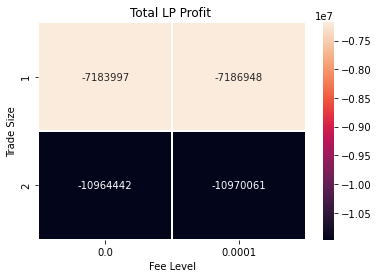

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 1

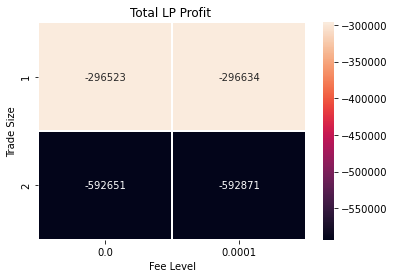

In [13]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 2

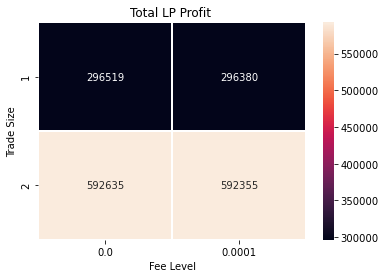

In [14]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix2, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 3

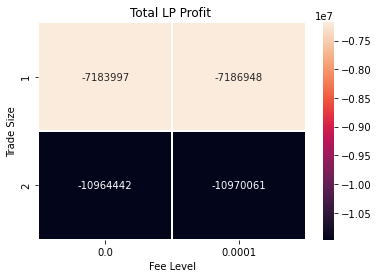

In [15]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix3, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 4

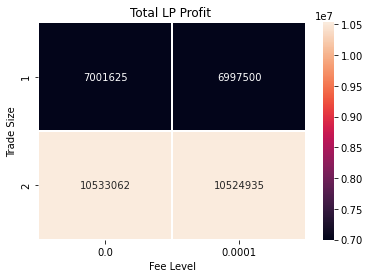

In [16]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix4, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 5

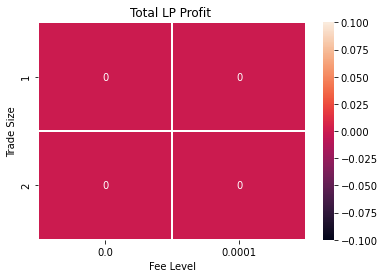

In [17]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix5, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

## Relative Returns for LPs

In [18]:
matrix_ror

array([[ -8,  -8],
       [-13, -13]])

In [19]:
x_axis_labels

(0.0, 0.0001)

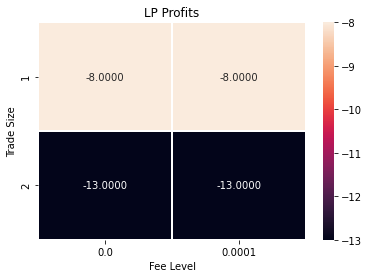

In [20]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 1

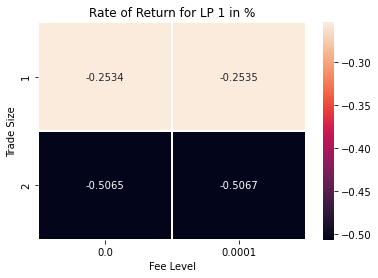

In [21]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 1 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()


### LP 2

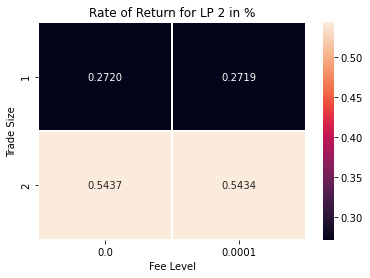

In [22]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror2, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 2 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 3

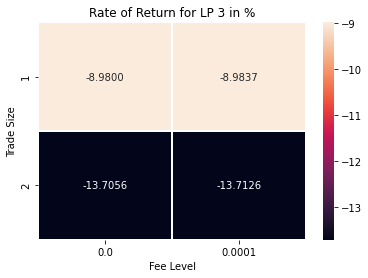

In [23]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror3, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 3 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 4

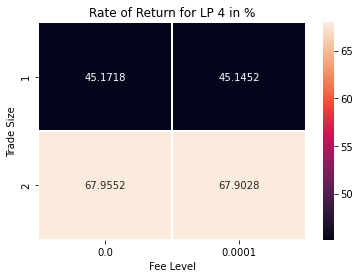

In [24]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror4, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 4 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 5

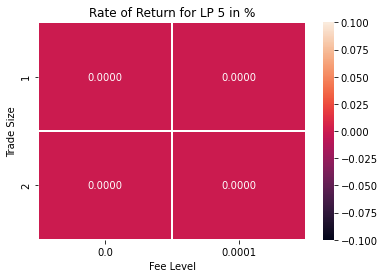

In [25]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror5, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 5 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

[0]


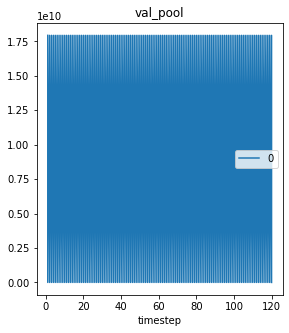

In [26]:
from model import plot_utils as pu
varlist = ['val_pool']
dataframe = profit_results[profit_results['simulation'] == 0]
dataframe = dataframe[dataframe['substep'] == 3]
dataframe = dataframe[dataframe['run'] == 1]
#dataframe = dataframe[dataframe['agent_label'] == 'LP4']
pu.plot_vars(dataframe, varlist)

## Debugging

In [27]:
profit_results

simulation  subset  run  substep  timestep agent_label         q  \
0              0       0    1        3         1      Trader 988862.28   
1              0       0    1        3         1         LP1      0.00   
2              0       0    1        3         1         LP2      0.00   
3              0       0    1        3         1         LP3      0.00   
4              0       0    1        3         1         LP4      0.00   
...          ...     ...  ...      ...       ...         ...       ...   
2875           3       0    1        3       120         LP1      0.00   
2876           3       0    1        3       120         LP2      0.00   
2877           3       0    1        3       120         LP3      0.00   
2878           3       0    1        3       120         LP4      0.00   
2879           3       0    1        3       120         LP5      0.00   

            s-0        s-1       s-2  ...  token_list-1  token_list-2  \
0             0          0         0  ...            R2            R3   
1     117000000          0         0  ...            R2            R3   
2             0  109000000         0  ...            R2            R3   
3             0          0  80000000  ...            R2            R3   
4             0          0         0  ...            R2            R3   
...         ...        ...       ...  ...           ...           ...   
2875  117000000          0         0  ...            R2            R3   
2876          0  109000000         0  ...            R2            R3   
2877          0          0  80000000  ...            R2            R3   
2878          0          0         0  ...            R2            R3   
2879          0          0         0  ...            R2            R3   

      token_list-3  token_list-4  fee_assets  fee_HDX  n       val_pool  \
0               R4            R5        0.00     0.01  5 17935334506.97   
1               R4            R5        0.00     0.01  5   117000000.00   
2               R4            R5        0.00     0.01  5   109000000.00   
3               R4            R5        0.00     0.01  5    78894090.85   
4               R4            R5        0.00     0.01  5    16570770.28   
...            ...           ...         ...      ... ..            ...   
2875            R4            R5        0.00     0.01  5   116407128.13   
2876            R4            R5        0.00     0.01  5   109592355.91   
2877            R4            R5        0.00     0.01  5    66979449.46   
2878            R4            R5        0.00     0.01  5    27943479.92   
2879            R4            R5        0.00     0.01  5      100000.00   

           val_hold     pool_val  
0    17935409726.02 321600000.00  
1      117000000.00 321600000.00  
2      109000000.00 321600000.00  
3       80015950.24 321600000.00  
4       15419968.45 321600000.00  
...             ...          ...  
2875   117000431.67 321585249.66  
2876   108999541.47 321585249.66  
2877    80178929.25 321585249.66  
2878    14823572.33 321585249.66  
2879      100000.00 321585249.66  

[2880 rows x 61 columns]

In [28]:
profit_results[['Q-0', 'simulation', 'subset', 'run', 'substep', 'timestep', 'agent_label']].head(20)

Q-0  simulation  subset  run  substep  timestep agent_label
0  117000000.00           0       0    1        3         1      Trader
1  117000000.00           0       0    1        3         1         LP1
2  117000000.00           0       0    1        3         1         LP2
3  117000000.00           0       0    1        3         1         LP3
4  117000000.00           0       0    1        3         1         LP4
5  117000000.00           0       0    1        3         1         LP5
6  116957627.59           0       0    1        3         2      Trader
7  116957627.59           0       0    1        3         2         LP1
8  116957627.59           0       0    1        3         2         LP2
9  116957627.59           0       0    1        3         2         LP3
10 116957627.59           0       0    1        3         2         LP4
11 116957627.59           0       0    1        3         2         LP5
12 117000001.13           0       0    1        3         3      Trader
13 117000001.13           0       0    1        3         3         LP1
14 117000001.13           0       0    1        3         3         LP2
15 117000001.13           0       0    1        3         3         LP3
16 117000001.13           0       0    1        3         3         LP4
17 117000001.13           0       0    1        3         3         LP5
18 116957628.72           0       0    1        3         4      Trader
19 116957628.72           0       0    1        3         4         LP1

In [29]:
profit_results['Q-0'].unique()

array([1.17000000e+08, 1.16957628e+08, 1.17000001e+08, 1.16957629e+08,
       1.16915256e+08, 1.16957630e+08, 1.16915257e+08, 1.16872885e+08,
       1.16830513e+08, 1.16788140e+08, 1.16745768e+08, 1.16703395e+08,
       1.16745769e+08, 1.16703397e+08, 1.16745770e+08, 1.16703398e+08,
       1.16661025e+08, 1.16703399e+08, 1.16661026e+08, 1.16618654e+08,
       1.16661027e+08, 1.16618655e+08, 1.16576283e+08, 1.16533910e+08,
       1.16576284e+08, 1.16618657e+08, 1.16661031e+08, 1.16618658e+08,
       1.16661032e+08, 1.16618660e+08, 1.16576287e+08, 1.16618661e+08,
       1.16576288e+08, 1.16533916e+08, 1.16576289e+08, 1.16618663e+08,
       1.16576291e+08, 1.16618664e+08, 1.16661038e+08, 1.16703411e+08,
       1.16745785e+08, 1.16703412e+08, 1.16745786e+08, 1.16788159e+08,
       1.16745787e+08, 1.16703415e+08, 1.16661042e+08, 1.16618670e+08,
       1.16661043e+08, 1.16618671e+08, 1.16661044e+08, 1.16618672e+08,
       1.16661045e+08, 1.16618673e+08, 1.16661047e+08, 1.16703420e+08,
      

In [30]:
qcalc = 117000000 / 159024416.08
qcalc

0.7357360767867314

In [31]:
profit_results[['R-0', 'simulation', 'subset', 'run', 'substep', 'timestep', 'agent_label']].head(20)

R-0  simulation  subset  run  substep  timestep agent_label
0  7000.00           0       0    1        3         1      Trader
1  7000.00           0       0    1        3         1         LP1
2  7000.00           0       0    1        3         1         LP2
3  7000.00           0       0    1        3         1         LP3
4  7000.00           0       0    1        3         1         LP4
5  7000.00           0       0    1        3         1         LP5
6  6997.46           0       0    1        3         2      Trader
7  6997.46           0       0    1        3         2         LP1
8  6997.46           0       0    1        3         2         LP2
9  6997.46           0       0    1        3         2         LP3
10 6997.46           0       0    1        3         2         LP4
11 6997.46           0       0    1        3         2         LP5
12 7000.00           0       0    1        3         3      Trader
13 7000.00           0       0    1        3         3         LP1
14 7000.00           0       0    1        3         3         LP2
15 7000.00           0       0    1        3         3         LP3
16 7000.00           0       0    1        3         3         LP4
17 7000.00           0       0    1        3         3         LP5
18 6997.46           0       0    1        3         4      Trader
19 6997.46           0       0    1        3         4         LP1

In [32]:
rcalc = 5150.15 / 7000
rcalc

0.7357357142857143

In [33]:
profit_results.columns.unique

<bound method Index.unique of Index(['simulation', 'subset', 'run', 'substep', 'timestep', 'agent_label',
       'q', 's-0', 's-1', 's-2', 's-3', 's-4', 'r-0', 'r-1', 'r-2', 'r-3',
       'r-4', 'p-0', 'p-1', 'p-2', 'p-3', 'p-4', 'R-0', 'R-1', 'R-2', 'R-3',
       'R-4', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'Q-4', 'S-0', 'S-1', 'S-2', 'S-3',
       'S-4', 'A-0', 'A-1', 'A-2', 'A-3', 'A-4', 'B-0', 'B-1', 'B-2', 'B-3',
       'B-4', 'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'val_pool', 'val_hold', 'pool_val'],
      dtype='object')>

#### limit to one agent only

In [34]:
profit_results['agent_label']

0       Trader
1          LP1
2          LP2
3          LP3
4          LP4
         ...  
2875       LP1
2876       LP2
2877       LP3
2878       LP4
2879       LP5
Name: agent_label, Length: 2880, dtype: object

In [35]:
profit_results_trader = profit_results[profit_results['agent_label'] == 'Trader']
profit_results_trader


simulation  subset  run  substep  timestep agent_label          q  s-0  \
0              0       0    1        3         1      Trader  988862.28    0   
6              0       0    1        3         2      Trader  988438.55    0   
12             0       0    1        3         3      Trader  988014.82    0   
18             0       0    1        3         4      Trader  987591.09    0   
24             0       0    1        3         5      Trader  976453.37    0   
...          ...     ...  ...      ...       ...         ...        ...  ...   
2850           3       0    1        3       116      Trader -345914.96    0   
2856           3       0    1        3       117      Trader -346762.13    0   
2862           3       0    1        3       118      Trader -368008.55    0   
2868           3       0    1        3       119      Trader -389254.95    0   
2874           3       0    1        3       120      Trader -390102.07    0   

      s-1  s-2  ...  token_list-1  token_list-2  token_list-3  token_list-4  \
0       0    0  ...            R2            R3            R4            R5   
6       0    0  ...            R2            R3            R4            R5   
12      0    0  ...            R2            R3            R4            R5   
18      0    0  ...            R2            R3            R4            R5   
24      0    0  ...            R2            R3            R4            R5   
...   ...  ...  ...           ...           ...           ...           ...   
2850    0    0  ...            R2            R3            R4            R5   
2856    0    0  ...            R2            R3            R4            R5   
2862    0    0  ...            R2            R3            R4            R5   
2868    0    0  ...            R2            R3            R4            R5   
2874    0    0  ...            R2            R3            R4            R5   

      fee_assets  fee_HDX  n       val_pool       val_hold     pool_val  
0           0.00     0.01  5 17935334506.97 17935409726.02 321600000.00  
6           0.00     0.01  5 17935336092.92 17935411736.80 321600000.00  
12          0.00     0.01  5 17935333659.41 17935409725.91 321600000.00  
18          0.00     0.01  5 17935335245.35 17935411736.69 321600000.00  
24          0.00     0.01  5 17935264133.35 17935404649.76 321600000.00  
...          ...      ... ..            ...            ...          ...  
2850        0.00     0.01  5 17933645272.64 17935420327.85 321585727.15  
2856        0.00     0.01  5 17933636309.51 17935412200.15 321585718.68  
2862        0.00     0.01  5 17933568570.94 17935404226.32 321585487.66  
2868        0.00     0.01  5 17933526818.24 17935398853.33 321585258.13  
2874        0.00     0.01  5 17933534103.17 17935406980.17 321585249.66  

[480 rows x 61 columns]

In [36]:
profit_results_trader[['timestep','q', 's-0', 's-1', 's-2', 's-3', 's-4', 'r-0', 'r-1', 'r-2', 'r-3',
       'r-4', 'p-0', 'p-1', 'p-2', 'p-3', 'p-4', 'R-0', 'R-1', 'R-2', 'R-3',
       'R-4', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'Q-4', 'S-0', 'S-1', 'S-2', 'S-3',
       'S-4', 'A-0', 'A-1', 'A-2', 'A-3', 'A-4', 'B-0', 'B-1', 'B-2', 'B-3',
       'B-4', 'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'val_pool', 'val_hold', 'pool_val']].head(20)

timestep         q  s-0  s-1  s-2  s-3  s-4        r-0        r-1  \
0           1 988862.28    0    0    0    0    0 1000000.00 1000000.00   
6           2 988438.55    0    0    0    0    0 1000002.54  999965.00   
12          3 988014.82    0    0    0    0    0 1000000.00 1000000.00   
18          4 987591.09    0    0    0    0    0 1000002.54  999965.00   
24          5 976453.37    0    0    0    0    0 1000002.54  999965.00   
30          6 965315.64    0    0    0    0    0 1000002.54  999965.00   
36          7 953493.43    0    0    0    0    0 1000002.54  999965.00   
42          8 953069.71    0    0    0    0    0 1000005.07  999930.00   
48          9 952645.97    0    0    0    0    0 1000002.54  999965.00   
54         10 952222.25    0    0    0    0    0 1000005.07  999930.00   
60         11 951798.52    0    0    0    0    0 1000007.61  999895.00   
66         12 940657.91    0    0    0    0    0 1000007.61  999895.00   
72         13 940234.18    0    0    0    0    0 1000010.14  999860.00   
78         14 939810.46    0    0    0    0    0 1000012.68  999825.00   
84         15 928669.84    0    0    0    0    0 1000012.68  999825.00   
90         16 917529.23    0    0    0    0    0 1000012.68  999825.00   
96         17 917105.50    0    0    0    0    0 1000015.22  999790.00   
102        18 905964.89    0    0    0    0    0 1000015.22  999790.00   
108        19 894143.31    0    0    0    0    0 1000015.22  999790.00   
114        20 893719.59    0    0    0    0    0 1000017.75  999755.00   

           r-2  ...  token_list-1  token_list-2  token_list-3  token_list-4  \
0   1183543.34  ...            R2            R3            R4            R5   
6   1183543.34  ...            R2            R3            R4            R5   
12  1183543.34  ...            R2            R3            R4            R5   
18  1183543.34  ...            R2            R3            R4            R5   
24  1367086.69  ...            R2            R3            R4            R5   
30  1550630.03  ...            R2            R3            R4            R5   
36  1355630.03  ...            R2            R3            R4            R5   
42  1355630.03  ...            R2            R3            R4            R5   
48  1355630.03  ...            R2            R3            R4            R5   
54  1355630.03  ...            R2            R3            R4            R5   
60  1355630.03  ...            R2            R3            R4            R5   
66  1539224.27  ...            R2            R3            R4            R5   
72  1539224.27  ...            R2            R3            R4            R5   
78  1539224.27  ...            R2            R3            R4            R5   
84  1722818.51  ...            R2            R3            R4            R5   
90  1906412.75  ...            R2            R3            R4            R5   
96  1906412.75  ...            R2            R3            R4            R5   
102 2090006.99  ...            R2            R3            R4            R5   
108 1895006.99  ...            R2            R3            R4            R5   
114 1895006.99  ...            R2            R3            R4            R5   

     fee_assets  fee_HDX  n       val_pool       val_hold     pool_val  
0          0.00     0.01  5 17935334506.97 17935409726.02 321600000.00  
6          0.00     0.01  5 17935336092.92 17935411736.80 321600000.00  
12         0.00     0.01  5 17935333659.41 17935409725.91 321600000.00  
18         0.00     0.01  5 17935335245.35 17935411736.69 321600000.00  
24         0.00     0.01  5 17935264133.35 17935404649.76 321600000.00  
30         0.00     0.01  5 17935203299.69 17935398649.21 321600000.00  
36         0.00     0.01  5 17935248104.96 17935405478.31 321600000.00  
42         0.00     0.01  5 17935249692.66 17935407490.82 321600000.00  
48         0.00     0.01  5 17935247257.39 17935405478.20 321600000.00  
54         0.00     0.01  5 17935248845.09 17935407490.72 32

In [37]:
profit_results_trader[['timestep','q', 's-0', 's-1', 's-2', 's-3', 's-4']].head(20)

timestep         q  s-0  s-1  s-2  s-3  s-4
0           1 988862.28    0    0    0    0    0
6           2 988438.55    0    0    0    0    0
12          3 988014.82    0    0    0    0    0
18          4 987591.09    0    0    0    0    0
24          5 976453.37    0    0    0    0    0
30          6 965315.64    0    0    0    0    0
36          7 953493.43    0    0    0    0    0
42          8 953069.71    0    0    0    0    0
48          9 952645.97    0    0    0    0    0
54         10 952222.25    0    0    0    0    0
60         11 951798.52    0    0    0    0    0
66         12 940657.91    0    0    0    0    0
72         13 940234.18    0    0    0    0    0
78         14 939810.46    0    0    0    0    0
84         15 928669.84    0    0    0    0    0
90         16 917529.23    0    0    0    0    0
96         17 917105.50    0    0    0    0    0
102        18 905964.89    0    0    0    0    0
108        19 894143.31    0    0    0    0    0
114        20 893719.59    0    0    0    0    0

In [38]:
profit_results_trader[['timestep', 'r-0', 'r-1', 'r-2', 'r-3', 'r-4', 'p-0', 'p-1', 'p-2', 'p-3', 'p-4']].head(20)

timestep        r-0        r-1        r-2         r-3      r-4  p-0  p-1  \
0           1 1000000.00 1000000.00 1183543.34   357419.35  1000000 0.00 0.00   
6           2 1000002.54  999965.00 1183543.34   357419.35  1000000 0.00 0.00   
12          3 1000000.00 1000000.00 1183543.34   357419.35  1000000 0.00 0.00   
18          4 1000002.54  999965.00 1183543.34   357419.35  1000000 0.00 0.00   
24          5 1000002.54  999965.00 1367086.69  -285161.29  1000000 0.00 0.00   
30          6 1000002.54  999965.00 1550630.03  -927741.94  1000000 0.00 0.00   
36          7 1000002.54  999965.00 1355630.03  -243026.59  1000000 0.00 0.00   
42          8 1000005.07  999930.00 1355630.03  -243026.59  1000000 0.00 0.00   
48          9 1000002.54  999965.00 1355630.03  -243026.59  1000000 0.00 0.00   
54         10 1000005.07  999930.00 1355630.03  -243026.59  1000000 0.00 0.00   
60         11 1000007.61  999895.00 1355630.03  -243026.59  1000000 0.00 0.00   
66         12 1000007.61  999895.00 1539224.27  -885607.24  1000000 0.00 0.00   
72         13 1000010.14  999860.00 1539224.27  -885607.24  1000000 0.00 0.00   
78         14 1000012.68  999825.00 1539224.27  -885607.24  1000000 0.00 0.00   
84         15 1000012.68  999825.00 1722818.51 -1528187.88  1000000 0.00 0.00   
90         16 1000012.68  999825.00 1906412.75 -2170768.53  1000000 0.00 0.00   
96         17 1000015.22  999790.00 1906412.75 -2170768.53  1000000 0.00 0.00   
102        18 1000015.22  999790.00 2090006.99 -2813349.17  1000000 0.00 0.00   
108        19 1000015.22  999790.00 1895006.99 -2129273.30  1000000 0.00 0.00   
114        20 1000017.75  999755.00 1895006.99 -2129273.30  1000000 0.00 0.00   

     p-2  p-3  p-4  
0   0.00 0.00 0.00  
6   0.00 0.00 0.00  
12  0.00 0.00 0.00  
18  0.00 0.00 0.00  
24  0.00 0.00 0.00  
30  0.00 0.00 0.00  
36  0.00 0.00 0.00  
42  0.00 0.00 0.00  
48  0.00 0.00 0.00  
54  0.00 0.00 0.00  
60  0.00 0.00 0.00  
66  0.00 0.00 0.00  
72  0.00 0.00 0.00  
78  0.00 0.00 0.00  
84  0.00 0.00 0.00  
90  0.00 0.00 0.00  
96  0.00 0.00 0.00  
102 0.00 0.00 0.00  
108 0.00 0.00 0.00  
114 0.00 0.00 0.00

In [39]:
profit_results_trader[['timestep', 'R-0', 'R-1', 'R-2', 'R-3',
       'R-4', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'Q-4', 'S-0', 'S-1', 'S-2', 'S-3',
       'S-4']].head(20)

timestep     R-0      R-1         R-2         R-3     R-4          Q-0  \
0           1 7000.00 90000.00 12816456.66  8942580.65  100000 117000000.00   
6           2 6997.46 90035.00 12816456.66  8942580.65  100000 116957627.59   
12          3 7000.00 90000.00 12816456.66  8942580.65  100000 117000001.13   
18          4 6997.46 90035.00 12816456.66  8942580.65  100000 116957628.72   
24          5 6997.46 90035.00 12632913.31  9585161.29  100000 116957628.72   
30          6 6997.46 90035.00 12449369.97 10227741.94  100000 116957628.72   
36          7 6997.46 90035.00 12644369.97  9543026.59  100000 116957628.72   
42          8 6994.93 90070.00 12644369.97  9543026.59  100000 116915256.30   
48          9 6997.46 90035.00 12644369.97  9543026.59  100000 116957629.84   
54         10 6994.93 90070.00 12644369.97  9543026.59  100000 116915257.43   
60         11 6992.39 90105.00 12644369.97  9543026.59  100000 116872885.02   
66         12 6992.39 90105.00 12460775.73 10185607.24  100000 116872885.02   
72         13 6989.86 90140.00 12460775.73 10185607.24  100000 116830512.61   
78         14 6987.32 90175.00 12460775.73 10185607.24  100000 116788140.20   
84         15 6987.32 90175.00 12277181.49 10828187.88  100000 116788140.20   
90         16 6987.32 90175.00 12093587.25 11470768.53  100000 116788140.20   
96         17 6984.78 90210.00 12093587.25 11470768.53  100000 116745767.79   
102        18 6984.78 90210.00 11909993.01 12113349.17  100000 116745767.79   
108        19 6984.78 90210.00 12104993.01 11429273.30  100000 116745767.79   
114        20 6982.25 90245.00 12104993.01 11429273.30  100000 116703395.38   

             Q-1         Q-2         Q-3       Q-4          S-0          S-1  \
0   109000000.00 78886227.54 16613772.46 100000.00 117000000.00 109000000.00   
6   109042372.41 78886227.54 16613772.46 100000.00 117000000.00 109000000.00   
12  108999998.87 78886227.54 16613772.46 100000.00 117000000.00 109000000.00   
18  109042371.28 78886227.54 16613772.46 100000.00 117000000.00 109000000.00   
24  109042371.28 77772455.09 17727544.91 100000.00 117000000.00 109000000.00   
30  109042371.28 76658682.63 18841317.37 100000.00 117000000.00 109000000.00   
36  109042371.28 77840903.90 17659096.10 100000.00 117000000.00 109000000.00   
42  109084743.70 77840903.90 17659096.10 100000.00 117000000.00 109000000.00   
48  109042370.16 77840903.90 17659096.10 100000.00 117000000.00 109000000.00   
54  109084742.57 77840903.90 17659096.10 100000.00 117000000.00 109000000.00   
60  109127114.98 77840903.90 17659096.10 100000.00 117000000.00 109000000.00   
66  109127114.98 76726842.36 18773157.64 100000.00 117000000.00 109000000.00   
72  109169487.39 76726842.36 18773157.64 100000.00 117000000.00 109000000.00   
78  109211859.80 76726842.36 18773157.64 100000.00 117000000.00 109000000.00   
84  109211859.80 75612780.81 19887219.19 100000.00 117000000.00 109000000.00   
90  109211859.80 74498719.26 21001280.74 100000.00 117000000.00 109000000.00   
96  109254232.21 74498719.26 21001280.74 100000.00 117000000.00 109000000.00   
102 109254232.21 73384657.71 22115342.29 100000.00 117000000.00 109000000.00   
108 109254232.21 74566815.21 20933184.79 100000.00 117000000.00 109000000.00   
114 109296604.62 74566815.21 20933184.79 100000.00 117000000.00 109000000.00   

            S-2         S-3       S-4  
0   80000000.00 15500000.00 100000.00  
6   80000000.00 15500000.00 100000.00  
12  80000000.00 15500000.00 100000.00  
18  80000000.00 15500000.00 100000.00  
24  80000000.00 15500000.00 100000.00  
30  80000000.00 15500000.00 100000.00  
36  80000000.00 15500000.00 100000.00  
42  80000000.00 15500000.00 100000.00  
48  80000000.00 15500000.00 100000.00  
54  80000000.00 15500000.00 100000.00  
60  80000000.00 15500000.00 100000.00  
66  80000000.00 15500000.00 100000.00  
72  80000000.00 15500000.00 100000.00  
78  80000000.00 15500000.00 100000.00  
84  80000000.00 15500000.00 100000.00  
90  80000000.00 15500000

In [40]:
delta_in_Q = -251244.99560589716 + 248732.54564983887
delta_in_Q

-2512.4499560582917

In [41]:
profit_results_trader[['timestep', 'A-0', 'A-1', 'A-2', 'A-3', 'A-4', 'B-0', 'B-1', 'B-2', 'B-3',
       'B-4', 'D', 'T', 'H']].head(20)

timestep  A-0  A-1  A-2  A-3  A-4  B-0  B-1  B-2  B-3  B-4         D  \
0           1    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  11137.72   
6           2    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  11561.45   
12          3    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  11985.18   
18          4    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  12408.91   
24          5    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  23546.63   
30          6    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  34684.36   
36          7    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  46506.57   
42          8    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  46930.29   
48          9    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  47354.03   
54         10    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  47777.75   
60         11    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  48201.48   
66         12    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  59342.09   
72         13    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  59765.82   
78         14    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  60189.54   
84         15    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  71330.16   
90         16    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  82470.77   
96         17    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  82894.50   
102        18    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00  94035.11   
108        19    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00 105856.69   
114        20    0    0    0    0    0 0.00 0.00 0.00 0.00 0.00 106280.41   

        T     H  
0    None  None  
6    None  None  
12   None  None  
18   None  None  
24   None  None  
30   None  None  
36   None  None  
42   None  None  
48   None  None  
54   None  None  
60   None  None  
66   None  None  
72   None  None  
78   None  None  
84   None  None  
90   None  None  
96   None  None  
102  None  None  
108  None  None  
114  None  None

In [42]:
profit_results_trader[['timestep', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'val_pool', 'val_hold', 'pool_val']].head(20)

timestep token_list-0 token_list-1 token_list-2 token_list-3  \
0           1           R1           R2           R3           R4   
6           2           R1           R2           R3           R4   
12          3           R1           R2           R3           R4   
18          4           R1           R2           R3           R4   
24          5           R1           R2           R3           R4   
30          6           R1           R2           R3           R4   
36          7           R1           R2           R3           R4   
42          8           R1           R2           R3           R4   
48          9           R1           R2           R3           R4   
54         10           R1           R2           R3           R4   
60         11           R1           R2           R3           R4   
66         12           R1           R2           R3           R4   
72         13           R1           R2           R3           R4   
78         14           R1           R2           R3           R4   
84         15           R1           R2           R3           R4   
90         16           R1           R2           R3           R4   
96         17           R1           R2           R3           R4   
102        18           R1           R2           R3           R4   
108        19           R1           R2           R3           R4   
114        20           R1           R2           R3           R4   

    token_list-4  fee_assets  fee_HDX  n       val_pool       val_hold  \
0             R5        0.00     0.01  5 17935334506.97 17935409726.02   
6             R5        0.00     0.01  5 17935336092.92 17935411736.80   
12            R5        0.00     0.01  5 17935333659.41 17935409725.91   
18            R5        0.00     0.01  5 17935335245.35 17935411736.69   
24            R5        0.00     0.01  5 17935264133.35 17935404649.76   
30            R5        0.00     0.01  5 17935203299.69 17935398649.21   
36            R5        0.00     0.01  5 17935248104.96 17935405478.31   
42            R5        0.00     0.01  5 17935249692.66 17935407490.82   
48            R5        0.00     0.01  5 17935247257.39 17935405478.20   
54            R5        0.00     0.01  5 17935248845.09 17935407490.72   
60            R5        0.00     0.01  5 17935250434.55 17935409504.96   
66            R5        0.00     0.01  5 17935188975.00 17935403438.27   
72            R5        0.00     0.01  5 17935190566.21 17935405454.25   
78            R5        0.00     0.01  5 17935192159.19 17935407471.98   
84            R5        0.00     0.01  5 17935139372.41 17935402318.22   
90            R5        0.00     0.01  5 17935093916.98 17935397932.26   
96            R5        0.00     0.01  5 17935095511.72 17935399951.72   
102           R5        0.00     0.01  5 17935056337.65 17935396219.71   
108           R5        0.00     0.01  5 17935076453.32 17935400461.90   
114           R5        0.00     0.01  5 17935078049.83 17935402483.10   

        pool_val  
0   321600000.00  
6   321600000.00  
12  321600000.00  
18  321600000.00  
24  321600000.00  
30  321600000.00  
36  321600000.00  
42  321600000.00  
48  321600000.00  
54  321600000.00  
60  321600000.00  
66  321600000.00  
72  321600000.00  
78  321600000.00  
84  321600000.00  
90  321600000.00  
96  321600000.00  
102 321600000.00  
108 321600000.00  
114 321600000.00